In [2]:
train_time_dict= {"ours":0.3085584,'fedadapter':1.3878,"adapter":4.1634,"bitfit":4.1634,"full":6.939}
    
local_data_num_dict = {"agnews":15,"yahoo":18,"yelp-p":65}

def round_to_time(round,eval_frequence,comm_time,method,local_data_num,adhoc=None):
        train_time = train_time_dict[method]
        if adhoc == None:
            adhoc = [1,1,1]
        else:
            adhoc = list(map(int,adhoc.split(",")))
        time_list = [0]
        if method == "ours":
            time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
        else:
            time = (train_time*local_data_num*adhoc[0] + 2*comm_time*local_data_num)/60
        time_list.append(time)
        for i in range(2,round):
            v_num = adhoc[i-1] if i-1 < len(adhoc) else adhoc[-1]
            if method == "ours":
                time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
            else:
                time += (train_time*local_data_num*v_num*eval_frequence + 2*comm_time*local_data_num)/60
            time_list.append(time)
        return time_list

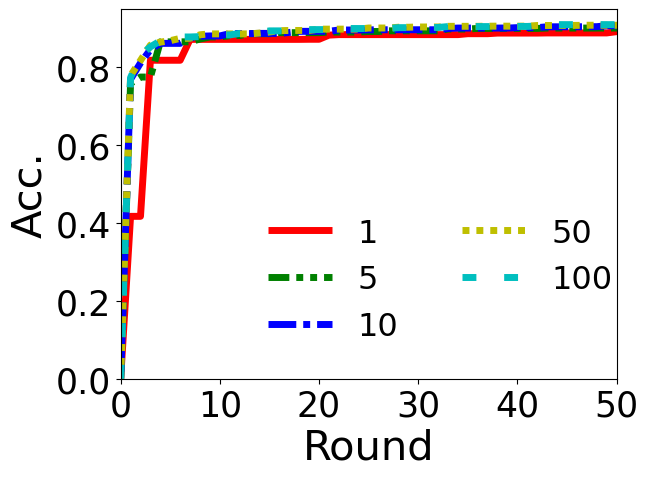

In [22]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np

eval_frequence = 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 5

# for i,file in enumerate(sorted(os.listdir(os.getcwd()))):
#     if file.endswith(".log"):
client_num_list = [1,5,10,50,100]
i = 0
for client_num in client_num_list:
    # with open(f"fedsgd_distilbert_20news_lr0.1_client_num_{client_num}.log") as f:
    file = f"fedsgd_distilbert_agnews_lr0.01_client_num_{client_num}.log"
    acc = [0]
    cur_max_acc = 0
    comm_time = 66378260*4 / (10 * 1024**2 /8)
    with open(file,"r") as f:
        log = f.readlines()
        for l in log:
            if "'acc':" in l:
                cur_acc = float(l[l.rfind("'acc':")+7:l.rfind(",")])
                if cur_acc>cur_max_acc:
                    cur_max_acc = cur_acc
                acc.append(cur_max_acc)
            # if len(acc)>200:
            #     break
        method = file.split("_")[0]
        plt.plot(range(len(acc)), acc, linestyle=linestyle[i], color=colors[i],label=f'{client_num}',linewidth=lw)
        i += 1
plt.xlabel("Round",fontsize=30)
plt.ylabel("Acc.",fontsize=30)
plt.xticks(range(0,51,10),size = 25)
plt.xlim(0,50)
plt.yticks([0,0.2,0.4,0.6,0.8],size = 25)
plt.ylim(0,0.95)
plt.legend(fontsize=23,frameon=False,loc=4,bbox_to_anchor=(1.05,0.02),ncol=2)
# plt.title(f"distilbert 20news",fontsize=30)
plt.savefig('/data/wyz/ForwardFL-Latex/figs/design-pitfall-clients-agnews.pdf', bbox_inches="tight")
plt.show()

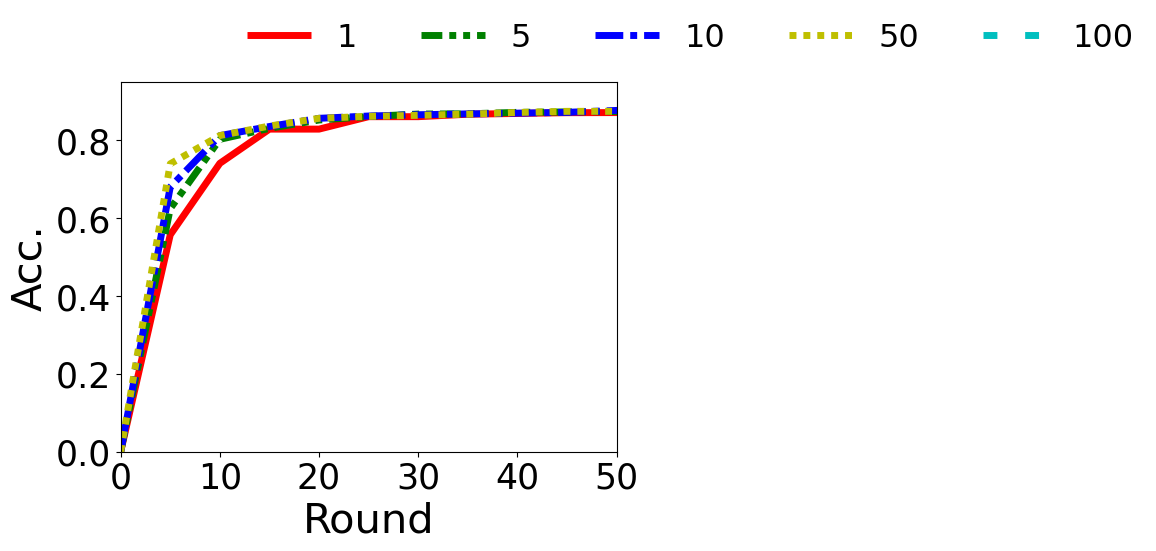

In [23]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np

eval_frequence = 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 5

# for i,file in enumerate(sorted(os.listdir(os.getcwd()))):
#     if file.endswith(".log"):
client_num_list = [1,5,10,50,100]
i = 0
for client_num in client_num_list:
    # with open(f"fedsgd_distilbert_20news_lr0.1_client_num_{client_num}.log") as f:
    file = f"fedsgd_distilbert_agnews_lr0.01_client_num_{client_num}_adapter.log"
    acc = [0]
    cur_max_acc = 0
    comm_time = 462644*4 / (10 * 1024**2 /8)
    with open(file,"r") as f:
        log = f.readlines()
        for l in log:
            if "'acc':" in l:
                cur_acc = float(l[l.rfind("'acc':")+7:l.rfind(",")])
                if cur_acc>cur_max_acc:
                    cur_max_acc = cur_acc
                acc.append(cur_max_acc)
            # if len(acc)>200:
            #     break
        method = file.split("_")[0]
        plt.plot(range(len(acc))[::5], acc[::5], linestyle=linestyle[i], color=colors[i],label=f'{client_num}',linewidth=lw)
        i += 1
plt.xlabel("Round",fontsize=30)
plt.ylabel("Acc.",fontsize=30)
plt.xticks(range(0,51,10),size = 25)
plt.xlim(0,50)
plt.yticks([0,0.2,0.4,0.6,0.8],size = 25)
plt.ylim(0,0.95)
# plt.text(180,0.,'clients num',fontsize = 20)
plt.legend(fontsize=23,frameon=False,loc=4,bbox_to_anchor=(2.1,1),ncol=5)
# plt.title(f"distilbert 20news",fontsize=30)
plt.savefig('/data/wyz/ForwardFL-Latex/figs/design-pitfall-clients-agnews-adapter.pdf', bbox_inches="tight")
plt.show()